<a href="https://colab.research.google.com/github/DmitriyDikunov/python-4-7/blob/main/%D0%9B%D0%90%D0%913_%D0%97%D0%90%D0%92%D0%94%D0%90%D0%9D%D0%9D%D0%AF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes_dataset = load_diabetes()
diabetes_df = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)
diabetes_df['target'] = diabetes_dataset.target
print(diabetes_df.head())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [2]:
print(diabetes_df.isnull().sum())
diabetes_df.fillna(diabetes_df.mean(), inplace=True)
print(diabetes_df.isnull().sum())


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [3]:
duplicates = diabetes_df.duplicated().sum()
print(f'Кількість дублікатів: {duplicates}')
if duplicates > 0:
    diabetes_df.drop_duplicates(inplace=True)
    print(f'Дублікати видалені. Кількість дублікатів тепер: {diabetes_df.duplicated().sum()}')


Кількість дублікатів: 0


In [4]:
unique_ages = diabetes_df['age'].unique()
print(f'Унікальні значення у стовпці "Вік": {unique_ages}')
if len(unique_ages) == 2:
    diabetes_df['age'] = diabetes_df['age'].apply(lambda x: 1 if x == unique_ages[0] else 0)
    print('Бінарні ознаки у стовпці "Вік" замінені на 0 та 1.')


Унікальні значення у стовпці "Вік": [ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025 -0.09632802  0.02717829
  0.01628068  0.04534098 -0.05273755 -0.00551455  0.07076875 -0.0382074
 -0.02730979 -0.04910502 -0.0854304  -0.06363517 -0.06726771 -0.10722563
 -0.02367725  0.05260606  0.06713621 -0.06000263  0.03444337  0.03081083
  0.04897352  0.01264814 -0.00914709 -0.09996055  0.01991321 -0.05637009
 -0.07816532 -0.04183994  0.05987114 -0.03457486 -0.03094232 -0.10359309
 -0.01641217  0.00175052 -0.02004471  0.0562386   0.02354575  0.0090156
 -0.07453279 -0.01277963 -0.08179786  0.08166637  0.11072668  0.09256398
  0.07440129  0.07803383  0.09619652  0.08893144]


In [5]:
print(diabetes_df.dtypes)
diabetes_df = diabetes_df.apply(pd.to_numeric, errors='coerce')
print(diabetes_df.dtypes)


age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


Кореляція з прогресом діабету:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


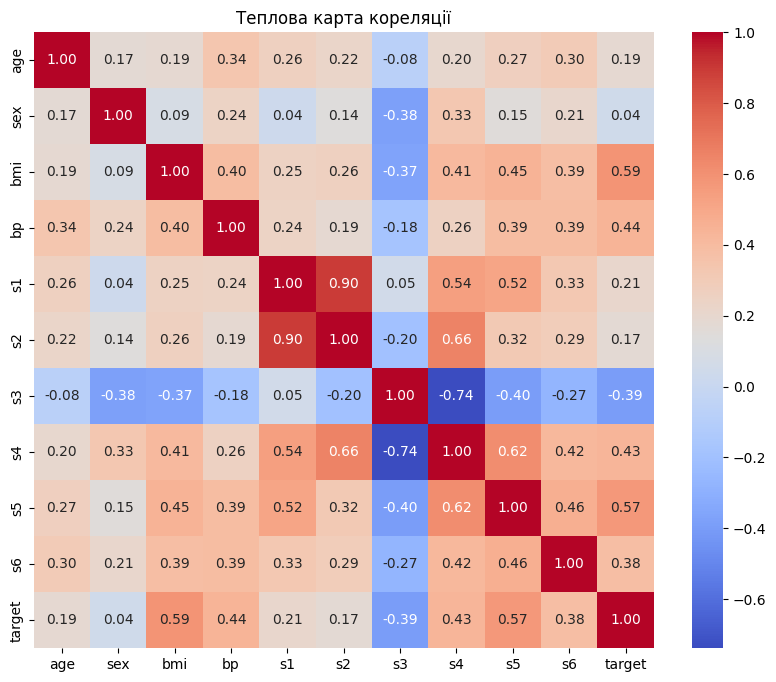

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation = diabetes_df.corr()
target_correlation = correlation['target'].sort_values(ascending=False)
print(f'Кореляція з прогресом діабету:\n{target_correlation}')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Теплова карта кореляції')
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(diabetes_df.drop('target', axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=diabetes_df.columns[:-1])
scaled_df['target'] = diabetes_df['target']
print(scaled_df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  target  
0 -0.054499  0.418531 -0.370989   151.0  
1 -0.830301 -1.436589 -1.938479    75.0  
2 -0.054499  0.060156 -0.545154   141.0  
3  0.721302  0.476983 -0.196823   206.0  
4 -0.054499 -0.672502 -0.980568   135.0  


In [8]:
from sklearn.model_selection import train_test_split
X = scaled_df.drop('target', axis=1)
y = scaled_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Розмір тренувальної вибірки: {X_train.shape}')
print(f'Розмір тестової вибірки: {X_test.shape}')

Розмір тренувальної вибірки: (353, 10)
Розмір тестової вибірки: (89, 10)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
print(f'Коефіцієнти лінійної регресії: {lin_reg.coef_}')

Коефіцієнти лінійної регресії: [  1.80291044 -11.50907105  25.80070495  16.53858529 -44.30640613
  24.64170961   7.77309591  13.09553713  35.01740872   2.31502709]


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f'Лінійна регресія - Коефіцієнт детермінації: {r2_lin}, середньовадратична помилка: {mse_lin}')
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'RandomForest регресія - Коефіцієнт детермінації: {r2_rf}, середньовадратична помилка: {mse_rf}')

Лінійна регресія - Коефіцієнт детермінації: 0.45260276297191937, Середньоквадратична помилка: 2900.193628493482
RandomForest регресія - Коефіцієнт детермінації: 0.44074575666493343, Середньоквадратична помилка: 2963.013847191012


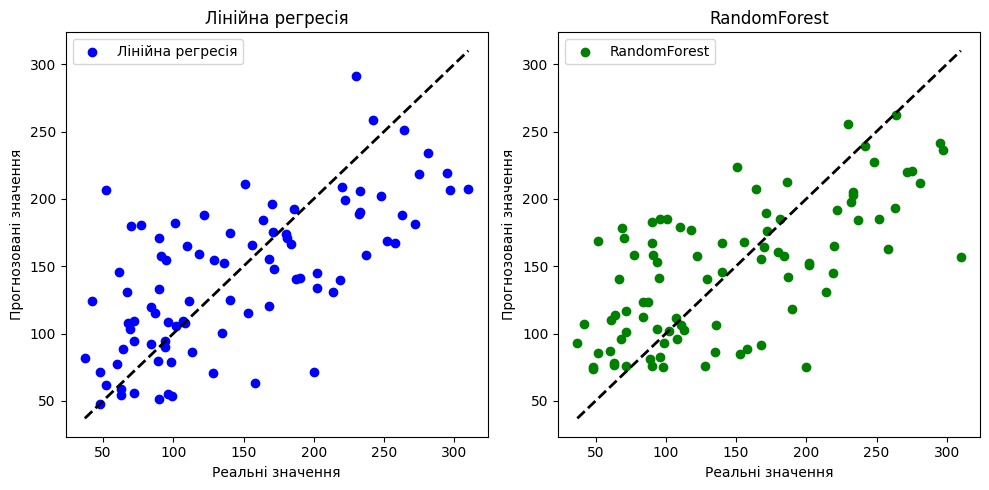

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue', label='Лінійна регресія')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', label='RandomForest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальні значення')
plt.ylabel('Прогнозовані значення')
plt.title('RandomForest')
plt.legend()
plt.tight_layout()
plt.show()

ВИСНОКОК : Ми провели повний аналіз даних із Diabetes Dataset, що включає перевірку та обробку пропусків, дублікатів, заміну бінарних ознак, масштабування та поділ даних на тренувальну і тестову вибірки. Побудовані графіки продемонстрували розбіжність між реальними та прогнозованими значеннями, що вказує на певний рівень похибки в прогнозуванні